#Reconocimiento facial personajes Harry Potter

by: Andrea Faúndez
19/01/2020

En primer lugar, se importan las librerías a utilizar, en particular, librerías para utilizar Google Colab. Además se importan librerías pata abrir imágenes y generar visualizaciones.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
from imutils import paths, build_montages
from matplotlib import pyplot as plt
from PIL import Image
from os import scandir, getcwd
import cv2
import os
import numpy as np
from time import sleep
#magic para generar plots en el mismo documento
%matplotlib inline 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


A continuación, se guarda el directorio en el que se trabajará en la variable path_data.

In [0]:
path_data = '/content/gdrive/My Drive/Colab Notebooks/Harry Potter'

Se define la función **show_images** que recibe la ruta donde se encuentran almacenadas las imágenes con las cuales se desea trabajar, y genera la visualización de todas la simágenes de la carpeta. Se define también la función **show_image**, en singular, qur recibe una imagen con su ruta, para generar la visualización de esa imagen. Si bien la segunda función podría haberse ejecutaco dentro de un ciclo for a fin de mostrar todas las imágenes, considero que la primera función es más directa, y por tanto, digna de definir y utilizar cuando se requiere conocer la totalidad de archivos tipo imagen.

In [0]:
def show_images(path):
  '''
  Recibe la ruta donde se alojan las imágenes, no
  retorna nada, sino que genera la visualización 
  de las imágenes de esa ruta.
  '''
  figura = plt.figure(figsize=(12,9)) 
  imagePaths = list(paths.list_images(path))
  try:
    for i in range (len(imagePaths)):
      figura = plt.subplot(7, 5, i+1)
      image = cv2.imread(imagePaths[i])
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      figura.axes.get_xaxis().set_visible(False)
      figura.axes.get_yaxis().set_visible(False)
      plt.title(imagePaths[i][-10:])
      plt.tight_layout()
      plt.imshow(image)
  except:
    print('Ha habido un error en la carga de imágenes')

def show_image(image_path):
  '''
  Recibe el nombre de un archivo imagen y
  genera la visualización de la imagen.
  '''
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  figura = plt.imshow(image)
  figura.axes.get_xaxis().set_visible(False)
  figura.axes.get_yaxis().set_visible(False)
  plt.title(image_path[-12:])

Se despliegan todas las imágenes a utilizar, por medio de la función **show_images** definida previamente.

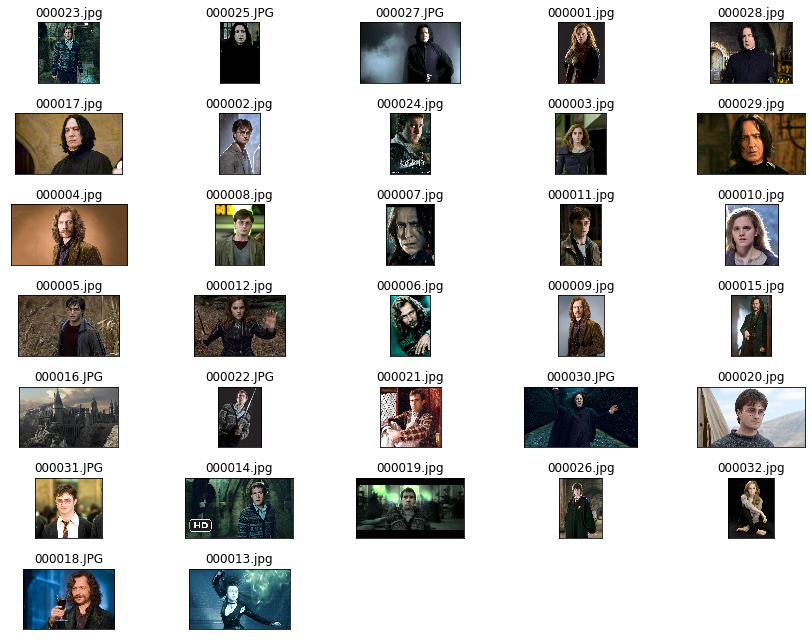

In [4]:
show_images(path_data+'/images3')

Se observa que el directorio contiene un total de 32 imágenes asociadas a la película Harry Potter. Además, la mayoría de las imágenes corresponden a perosnajes de la película, y cada personaje tiene más de una imagen.

Para continuar, se requiere instalar dlib, cmake y face recognition, en ese orden, debido a las dependencias que existen entre ellas. También debe instalar pickle si es que no la tiene.
Una vez instaladas las librerías, se importarán las dos librerías más relevantes para reconocimiento facial abordadas en este documento. Estas son **face_reconition** y **pickle**. Esta última muy utilizada para guardar archivos siempre que se esté trabajando con Python.


In [0]:
#!pip install https://pypi.python.org/packages/da/06/bd3e241c4eb0a662914b3b4875fc52dd176a9db0d4a2c915ac2ad8800e9e/dlib-19.7.0-cp36-cp36m-win_amd64.whl#md5=b7330a5b2d46420343fbed5df69e6a3f
#!pip install cmake
#!pip install face_recognition
import face_recognition
import pickle

Ahora se define la función file_generator, que generará un archivo con el nombre de cada imagen, la ubicación de la cara en cada imagen y el vector de características de cada rostro localizado. 
Este vector es muy importante ya que almacenará las singularidades de los rostros de cada personaje. 
Para lo anterior se utiliza la librería **face_recognition** y sus métodos asociados **face_locations** que identifica la ubicación de un rostro dentro de una imagen, y el método **face_encodings** que genera el vector de características que posteriormente permitirá distinguir los rostros de cada personaje.

In [0]:
def file_generator(path, filename):
  '''
  Recibe la ruta donde se alojan las imágenes, el nombre del archivo
  que será generado, number_of_times_to_upsample y el modelo a utilizar
  para localizar los rostros en las imágenes. El archivo generado 
  contendrá el nombre de cada imagen, la ubicación de la cara de cada 
  imagen y el vector de características de cada imagen de la ruta dada.
  '''
  imagePaths = list(paths.list_images(path))
  datos = []
  try:
    for (i, imagePath) in enumerate(imagePaths):
      #Se muestra el avance del procesamiento de las imágenes
      print("Procesando imagen {}/{}".format(i+1,len(imagePaths)))
      image = cv2.imread(imagePath)
      rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      boxes = face_recognition.face_locations(rgb, model='cnn') 
      
      #Crea los vectores de características y los guarda en la variable encodings
      encodings = face_recognition.face_encodings(rgb, boxes)

      #A continuación, se construye un diccionario con en el nombre de la imagen,
      #la localización de la cara en la imagen y el vector de características
      #generado previamente 
      d = [{"nombre_imagen": imagePath, 
            "localizacion_cara": box, 
            "vector_caracteristicas": enc}
            for (box, enc) in zip(boxes, encodings)]
      datos.extend(d)
      sleep(2)

    # Se guarda el diccionario con los datos anteriores en un formato donde no 
    #importa la serialización, se guarda en un archivo cuyo nombre debe ser 
    #entregado por parámetro a la función.
    f = open(path+filename, "wb")
    f.write(pickle.dumps(datos))
    f.close()
    print('Se generó archivo {} en el directorio {}'.format(filename,path))
  except:
    print('error')


In [7]:
file_generator(path_data+'/images3/','vectores_caract.txt')

Procesando imagen 1/32
Procesando imagen 2/32
Procesando imagen 3/32
Procesando imagen 4/32
Procesando imagen 5/32
Procesando imagen 6/32
Procesando imagen 7/32
Procesando imagen 8/32
Procesando imagen 9/32
Procesando imagen 10/32
Procesando imagen 11/32
Procesando imagen 12/32
Procesando imagen 13/32
Procesando imagen 14/32
Procesando imagen 15/32
Procesando imagen 16/32
Procesando imagen 17/32
Procesando imagen 18/32
Procesando imagen 19/32
Procesando imagen 20/32
Procesando imagen 21/32
Procesando imagen 22/32
Procesando imagen 23/32
Procesando imagen 24/32
Procesando imagen 25/32
Procesando imagen 26/32
Procesando imagen 27/32
Procesando imagen 28/32
Procesando imagen 29/32
Procesando imagen 30/32
Procesando imagen 31/32
Procesando imagen 32/32
Se generó archivo vectores_caract.txt en el directorio /content/gdrive/My Drive/Colab Notebooks/Harry Potter/images3/


Ahora se importan las librerías para realizar el clustering, donde cada cluster corresponderá a un personaje de Harry Potter.

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Para continuar, se cargan los datos de las imágenes desde el archivo previamente generado. Para verificar que las imágenes fueron cargadas correctamente, se contarán los rostros detectados.

In [9]:
data = pickle.loads(open(path_data+'/images3/vectores_caract.txt', "rb").read())
data = np.array(data)
encodings = [d["vector_caracteristicas"] for d in data]
print("Caras detectadas:", len(data))

Caras detectadas: 31


A través de **Face recognition** se detectaron 31 rostros entre las 32 imágenes alocadas en el directorio. Esto es correcto, ya que la imagen "000016.JPG" no contiene rostros, sino que corresponde al castillo Hogwarts.

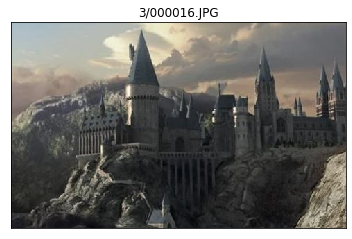

In [10]:
show_image(path_data+'/images3/000016.JPG')

Una vez que verificamos la correcta carga de las imágenes, podemos continuar con la clusterización.
Para identificar los cluster (personajes) en este dataset, se utiliza el algoritmo **DBSCAN**, que corresponde a un algoritmo de clustering por **densidades**. Para utilizarlo no se requiere conocer previamente la cantidad de cluster, pero sí se requiere determinar un epsilon y una cantidad mínima de observaciones para que un cluster sea identificado como tal.
En este paso pueden llevarse a cabo vrias iteraciones a fin de ajustar los hiperparámetros del algoritmo.

In [11]:
dbsc = DBSCAN(eps = 0.6, min_samples = 3).fit(encodings)
clusters = np.unique(dbsc.labels_)
dbsc.labels_

array([ 0,  1,  1,  2,  1,  1,  3,  0,  2,  1,  4,  3,  1,  3,  2,  3,  2,
        4,  4,  4,  0,  0,  1,  3,  3,  0,  0,  0,  2,  4, -1])

Una vez identificados los id de los clusters, guardaremos estos datos asociándolos a los datos previamente generados (nombre imagen-ubicación del rostro-vector de características).

In [0]:
for i in range(len(data)):
  data[i]['cluster'] = dbsc.labels_[i]

¿Cuántos personajes distintos podemos identificar?

Para responder esta pregunta, basta con contar los id únicos de clusters, pero recordando siempre que el algoritmo DBSCAN etiqueta como cluster **-1** a aquellas observaciones que son **outliers**.

In [13]:
n_clusters = len(set(clusters)-{-1})
print("Cantidad de personajes en el dataset: {}".format(n_clusters))

Cantidad de personajes en el dataset: 5


A continuación, se define la función view_cluster a fin de visualizar todos los rostros de un mismo personaje. Se desplegará un máximo de 9 imágenes por cada personaje (sin outliers).

In [0]:
def view_cluster(data, cluster, algorithm, cluster_names):
  '''
  Recibe la data, el id del cluster a visualizar, el algoritmo de
  clusterización utilizado y un diccionario con las etiquetas de
  cada cluster, para generar la visualización de a lo más 9 imágenes
  al azar del cluster.
  '''
  image_cluster = np.where(algorithm.labels_ == cluster)[0]
  image_selecction = np.random.choice(image_cluster, size=min(9, len(image_cluster)),replace=False)
  faces_cluster = []
  for i in image_selecction:
    image = cv2.imread(data[i]["nombre_imagen"])
    (arr, der, aba, izq) = data[i]["localizacion_cara"]
    face = image[arr:aba, izq:der]
    face = cv2.resize(face, (150, 150))
    faces_cluster.append(face)
  show_faces = build_montages(faces_cluster, (150, 150), (len(faces_cluster), 1))[0]
  show_clusters = cv2.cvtColor(show_faces, cv2.COLOR_BGR2RGB)
  title = cluster_names[cluster]
  figura = plt.imshow(show_clusters)
  figura.axes.get_xaxis().set_visible(False)
  figura.axes.get_yaxis().set_visible(False)
  plt.title(title)
  plt.show()

Se genera el diccionario con las etiquetas a mostrar en cada cluster y posteriormente se genera la visualización para todas las imágenes cuyo id cluster sea superior a -1.

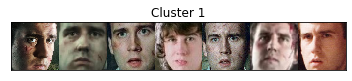

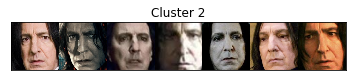

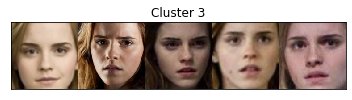

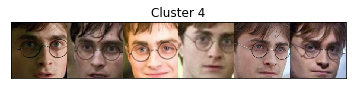

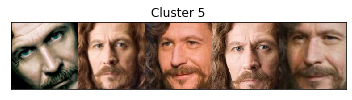

In [15]:
cluster_names = {-1:'Outlier',
                  0:'Cluster 1',
                  1:'Cluster 2',
                  2:'Cluster 3',
                  3:'Cluster 4',
                  4:'Cluster 5'}
for cluster in clusters:
  if cluster > -1:       
    view_cluster(data, cluster, dbsc, cluster_names)

Dado que yo conozco los nombres de todos los personajes, reemplazaré las etiquetas por los nombres de los personajes.

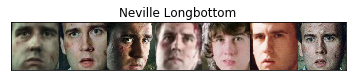

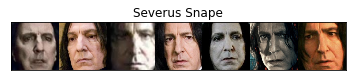

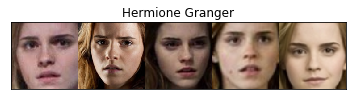

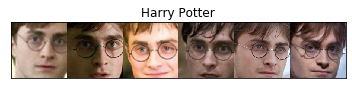

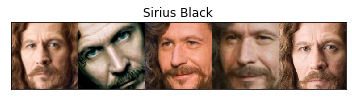

In [16]:
cluster_names = {-1:'Outlier',
                  0:'Neville Longbottom',
                  1:'Severus Snape',
                  2:'Hermione Granger',
                  3:'Harry Potter',
                  4:'Sirius Black'
                  }
for cluster in clusters: 
  if cluster > -1:      
    view_cluster(data, cluster, dbsc, cluster_names)

Al observar los id de los clusters por medio del atributo labels del modelo de clustering, vale decir, dbsc.labels_, encontramos un outlier, es decir, un cluster con valor -1.
¿Quién es el outlier?

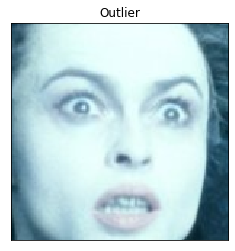

In [17]:
view_cluster(data,-1,dbsc, cluster_names)

¡Es Bellatrix Lestrange!

Con eso termina este notebook de reconocimiento facial de personajes de Harry Potter. Ojalá te haya gustado mi dataset!!